In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
# Import the data

file = "myopia.csv"
df = pd.read_csv(file)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Remove the "MYOPIC" column from the dataset

X = df.drop(columns = ["MYOPIC"], axis=1)

In [4]:
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [ ]:
# Normalize data
# normalized = normalize(X)

In [ ]:
# Perform hierarchical clustering
# mergings = linkage(normalized, method="ward")

In [ ]:
# mergings[:5]

In [5]:
# Standarize data
scaled = StandardScaler().fit_transform(X)
print(scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


In [6]:
# Perform dimensionality reduction with PCA

pca = PCA(n_components=0.99)

# Get two principal components for the data
X_pca = pca.fit_transform(scaled)

X_pca.shape

(618, 12)

In [7]:
# Transform PCA data to a DataFrame
df_X_pca = pd.DataFrame(
    data=X_pca, columns=["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10", "pc11", "pc12"]
)
df_X_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-1.389112,-0.574909
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-0.118153,0.527492
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,-0.287739,0.128478
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0.652956,-0.672679
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0.007640,0.995370


In [8]:
# Check to see if variance is 0.99
pca.explained_variance_ratio_.sum()

0.9999988998816082

In [9]:
# Fetch the explained variance
# pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566,
       0.04286506, 0.03839767])

In [10]:
# run t-SNE model
tsne = TSNE(learning_rate=35)

In [11]:
# further reduce the dataset dimensions
tsne_features = tsne.fit_transform(df_X_pca)

In [12]:
# Check if dimensions have been reduced to two
tsne_features.shape

(618, 2)

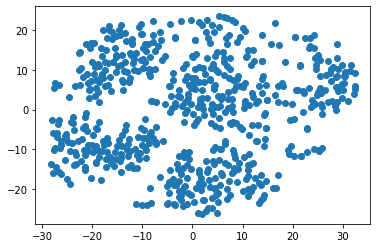

In [13]:
# create a scatter plot of the t-SNE output
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

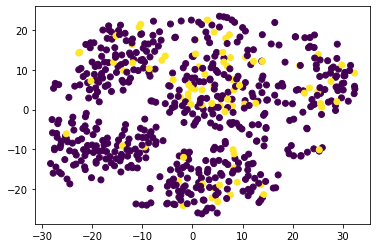

In [14]:
# Are there distinct clusters? Yes, see the yellow dots below
labels = df ["MYOPIC"]

plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

In [15]:
# Use a for loop to determine the inertia for each k between 1 through 10

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,234077.487563
1,2,126281.996310
2,3,93178.921127
3,4,78306.115708
4,5,67315.950891


In [ ]:
# print(list(range(1,11)))

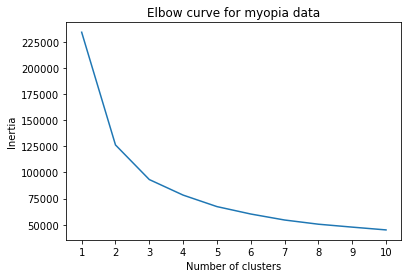

In [16]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopia data')
plt.show()

From the Elbow curve, K=3.

In [23]:
# Run model with K = 3
model = KMeans(n_clusters=3, random_state=0)
model.fit(df_X_pca)

KMeans(n_clusters=3, random_state=0)

In [22]:
# Get predictions
predictions = model.predict(df_X_pca)
print(predictions)

[1 2 1 1 2 1 1 1 2 1 0 2 1 2 2 2 2 2 0 1 1 1 1 0 2 1 2 2 2 2 1 0 2 1 2 2 0
 2 1 2 1 2 0 2 1 2 0 2 2 2 1 1 1 1 2 1 2 2 1 1 2 2 2 2 0 2 1 2 2 1 0 2 0 0
 2 2 2 0 1 1 1 1 1 2 1 2 2 2 2 2 2 1 2 2 1 0 1 2 2 2 0 1 0 1 0 0 1 1 1 1 0
 1 2 2 2 1 2 1 2 1 1 1 2 2 0 0 1 1 2 1 1 1 2 2 1 1 2 1 1 2 1 2 1 2 1 2 1 2
 2 0 1 1 0 2 1 1 1 2 2 2 1 1 2 2 2 2 0 1 2 1 2 1 0 1 1 2 2 1 1 2 2 0 1 2 2
 0 2 1 2 2 2 2 2 2 1 1 1 2 1 1 1 1 2 1 2 1 1 2 1 2 0 2 2 1 1 2 0 1 2 1 2 1
 0 1 1 0 0 2 1 2 0 2 1 0 2 2 1 1 2 2 0 1 1 1 1 1 2 1 0 1 2 0 1 0 2 1 1 1 2
 1 2 1 1 2 1 2 1 2 1 1 2 2 2 0 2 1 1 1 0 1 2 0 2 0 2 2 2 0 1 2 1 1 2 1 0 1
 1 1 0 1 1 2 1 0 2 2 0 1 1 0 1 1 1 2 1 1 1 2 1 0 2 1 2 0 1 1 1 1 2 2 1 2 1
 1 1 1 2 2 1 1 1 2 1 1 2 1 1 2 0 2 1 1 1 1 2 2 1 2 1 2 1 2 1 1 1 1 1 2 2 1
 2 2 2 1 0 2 2 1 1 2 0 1 2 2 2 0 1 0 2 0 1 0 2 1 2 1 2 1 2 2 2 1 2 0 0 1 2
 0 2 2 2 2 1 2 1 1 1 2 2 1 0 0 1 1 0 2 2 0 1 2 0 2 1 1 1 1 1 0 1 0 1 1 1 0
 2 1 2 1 1 2 0 0 2 0 1 2 2 1 2 2 1 2 1 1 0 2 1 0 1 0 1 0 2 1 0 2 1 2 1 2 1
 1 2 0 2 2 1 2 2 0 0 1 1 

In [17]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_X_pca)

# Predict clusters
predictions = model.predict(df_X_pca)

# Add the predicted class column to the dataframe
df_X_pca["class"] = model.labels_
df_X_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-1.389112,-0.574909,2
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-0.118153,0.527492,0
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,-0.287739,0.128478,2
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0.652956,-0.672679,2
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0.007640,0.995370,0


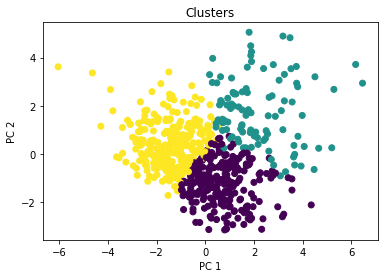

In [24]:
# Visualize the clusters
plt.scatter(x=df_X_pca['pc1'], y=df_X_pca['pc2'], c=df_X_pca['class'])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clusters')
plt.show()

### Patients can be clustered into 3 clusters since the elbow of the elbow plot is at k=3.